## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

### Reading the file

In [2]:
df = pd.read_csv("Consumer_Complaints.csv")

### Data Exploration

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State/ZIP,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/21/2017,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX 77075,Older American,NaN,Phone,03/21/2017,Closed with non-monetary relief,Yes,No,2397100
1,04/19/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL 60643,NaN,NaN,Web,04/20/2017,Closed with explanation,Yes,No,2441777
2,04/19/2017,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL 62025,NaN,NaN,Referral,04/20/2017,Closed with explanation,Yes,No,2441830
3,04/14/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA 90305,NaN,NaN,Referral,04/14/2017,Closed with explanation,Yes,No,2436165
4,04/19/2017,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA 70571,NaN,NaN,Postal mail,04/21/2017,Closed with explanation,Yes,No,2441726


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777959 entries, 0 to 777958
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 777959 non-null  object
 1   Product                       777959 non-null  object
 2   Sub-product                   542822 non-null  object
 3   Issue                         777959 non-null  object
 4   Sub-issue                     320986 non-null  object
 5   Consumer complaint narrative  157865 non-null  object
 6   Company public response       197884 non-null  object
 7   Company                       777959 non-null  object
 8   State/ZIP                     777959 non-null  object
 9   Tags                          109264 non-null  object
 10  Consumer consent provided?    288311 non-null  object
 11  Submitted via                 777959 non-null  object
 12  Date sent to company          777959 non-null  object
 13 

In [5]:
df.shape

(777959, 17)

### Data Cleaning

In [6]:
df.drop_duplicates(keep=False, inplace=True)

In [7]:
df.shape

(777959, 17)

In [8]:
# check for missing values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending = False)

Tags                            85.955044
Consumer complaint narrative    79.707800
Company public response         74.563698
Consumer consent provided?      62.940078
Sub-issue                       58.739985
Sub-product                     30.224858
Consumer disputed?               1.226928
Date received                    0.000000
Date sent to company             0.000000
Timely response?                 0.000000
Company response to consumer     0.000000
State/ZIP                        0.000000
Submitted via                    0.000000
Product                          0.000000
Company                          0.000000
Issue                            0.000000
Complaint ID                     0.000000
dtype: float64

In [9]:
df["Tags"].unique()

array(['Older American', nan, 'Servicemember',
       'Older American, Servicemember'], dtype=object)

In [10]:
# we don't need the column Tags so we can drop it
df = df.drop(columns = ["Tags"])

In [11]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State/ZIP,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/21/2017,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX 77075,NaN,Phone,03/21/2017,Closed with non-monetary relief,Yes,No,2397100
1,04/19/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL 60643,NaN,Web,04/20/2017,Closed with explanation,Yes,No,2441777
2,04/19/2017,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL 62025,NaN,Referral,04/20/2017,Closed with explanation,Yes,No,2441830
3,04/14/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA 90305,NaN,Referral,04/14/2017,Closed with explanation,Yes,No,2436165
4,04/19/2017,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA 70571,NaN,Postal mail,04/21/2017,Closed with explanation,Yes,No,2441726


In [12]:
#split state
df["State"] = df["State/ZIP"].apply(lambda x : x.split(" ")[0])

In [13]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State/ZIP,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,State
0,03/21/2017,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX 77075,NaN,Phone,03/21/2017,Closed with non-monetary relief,Yes,No,2397100,TX
1,04/19/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL 60643,NaN,Web,04/20/2017,Closed with explanation,Yes,No,2441777,IL
2,04/19/2017,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL 62025,NaN,Referral,04/20/2017,Closed with explanation,Yes,No,2441830,IL
3,04/14/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA 90305,NaN,Referral,04/14/2017,Closed with explanation,Yes,No,2436165,CA
4,04/19/2017,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA 70571,NaN,Postal mail,04/21/2017,Closed with explanation,Yes,No,2441726,LA


In [14]:
#convert date to datetime
df["Date received"] = pd.to_datetime(df["Date received"])
df["Date sent to company"] = pd.to_datetime(df["Date sent to company"])

In [15]:
df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State/ZIP                               object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
State                                   object
dtype: object

In [16]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State/ZIP,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,State
0,2017-03-21,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX 77075,NaN,Phone,2017-03-21,Closed with non-monetary relief,Yes,No,2397100,TX
1,2017-04-19,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL 60643,NaN,Web,2017-04-20,Closed with explanation,Yes,No,2441777,IL
2,2017-04-19,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL 62025,NaN,Referral,2017-04-20,Closed with explanation,Yes,No,2441830,IL
3,2017-04-14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA 90305,NaN,Referral,2017-04-14,Closed with explanation,Yes,No,2436165,CA
4,2017-04-19,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA 70571,NaN,Postal mail,2017-04-21,Closed with explanation,Yes,No,2441726,LA


In [17]:
#Create a new column for the Year Received, Month Received and the Weekday Received
df["Year Received"] = df["Date received"].dt.year
df["Month Received"] = df["Date received"].dt.strftime("%B")
df["Weekday Received"] = df["Date received"].dt.strftime("%A")
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State/ZIP,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,State,Year Received,Month Received,Weekday Received
0,2017-03-21,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX 77075,NaN,Phone,2017-03-21,Closed with non-monetary relief,Yes,No,2397100,TX,2017,March,Tuesday
1,2017-04-19,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL 60643,NaN,Web,2017-04-20,Closed with explanation,Yes,No,2441777,IL,2017,April,Wednesday
2,2017-04-19,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL 62025,NaN,Referral,2017-04-20,Closed with explanation,Yes,No,2441830,IL,2017,April,Wednesday
3,2017-04-14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA 90305,NaN,Referral,2017-04-14,Closed with explanation,Yes,No,2436165,CA,2017,April,Friday
4,2017-04-19,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA 70571,NaN,Postal mail,2017-04-21,Closed with explanation,Yes,No,2441726,LA,2017,April,Wednesday


### Plot the yearly, monthly and weekday trend of the complaints

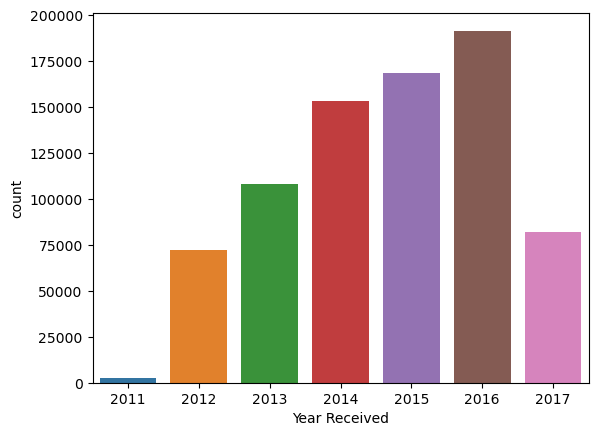

In [18]:
# year on year plot
sns.countplot(x=df["Year Received"])
plt.show()

In [19]:
min(df["Date received"]), max(df["Date received"])

(Timestamp('2011-12-01 00:00:00'), Timestamp('2017-05-18 00:00:00'))

 ###### The values for 2011 and 2017 seem really small, so I decided to investigate why. For 2011, we only have data for December while for 2017, we only have data until May 18. Because of this, I will remove 2011 and 2017 data from this analysis to get better accurate results

In [20]:
droplist = [2011,2017]
# drop rows from above list
df = df[df["Year Received"].isin(droplist) == False]
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State/ZIP,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,State,Year Received,Month Received,Weekday Received
7,2016-05-18,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company has responded to the consumer and the ...,"WELLS FARGO BANK, NATIONAL ASSOCIATION",NJ 8618,NaN,Referral,2016-05-23,Closed with explanation,Yes,No,1931957,NJ,2016,May,Wednesday
9,2016-11-18,Mortgage,Conventional fixed mortgage,Settlement process and costs,NaN,Started the refinance of home mortgage process...,NaN,AMERICAN NEIGHBORHOOD MORTGAGE,NJ 088XX,Consent provided,Web,2016-11-21,Closed with monetary relief,No,No,2216206,NJ,2016,November,Friday
12,2016-11-17,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"PMGI, LLC",CA 92356,NaN,Postal mail,2016-11-18,Closed with non-monetary relief,No,No,2214174,CA,2016,November,Thursday
22,2012-05-17,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA 90242,NaN,Referral,2012-05-22,Closed with non-monetary relief,No,No,81081,CA,2012,May,Thursday
28,2016-02-08,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,Company chooses not to provide a public response,EXPERIAN DELAWARE GP,NC 27703,NaN,Postal mail,2016-02-08,Closed with explanation,Yes,No,1776912,NC,2016,February,Monday


In [21]:
#Check to see if we succeeded
df["Year Received"].unique()

array([2016, 2012, 2014, 2015, 2013], dtype=int64)

### Let's plot the yearly, monthly and weekday trend of the complaints with the cleaned data

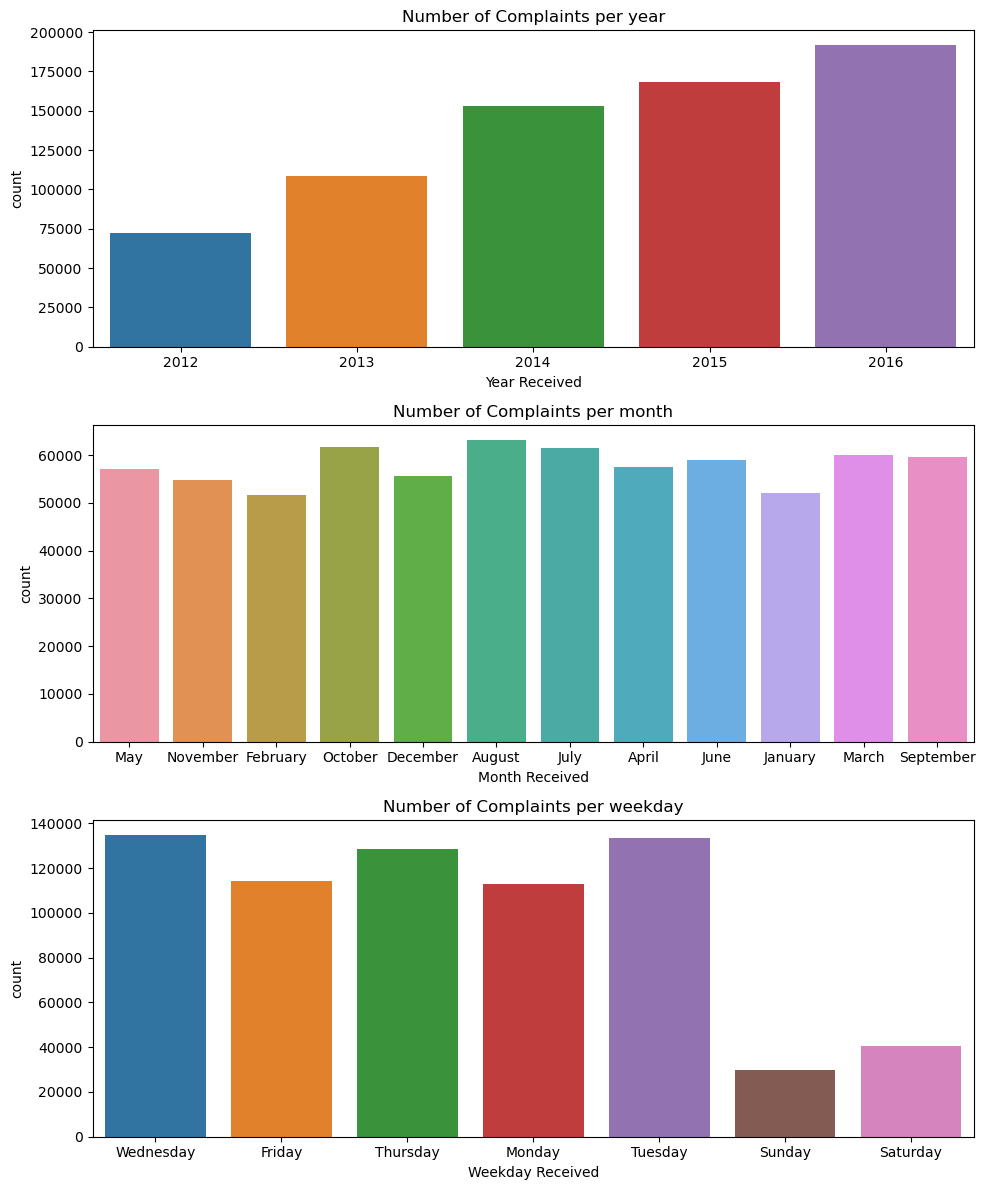

In [71]:
#fig = plt.figure(figsize=(50,15),dpi=100)
#plt.rcParams["figure.figsize"] = [15, 10]
#plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 12),dpi=100)
sns.countplot(x=df["Year Received"], ax=ax[0])
ax[0].set_title('Number of Complaints per year')
sns.countplot(x=df["Month Received"], ax=ax[1])
ax[1].set_title('Number of Complaints per month')
sns.countplot(x=df["Weekday Received"], ax=ax[2])
ax[2].set_title('Number of Complaints per weekday')
fig.tight_layout()
plt.show()

###### We can see from the graph above that there is an increasing number of complaints per year. This could be due to the fact that there are more customers acquired each year causing the number of complaints to go up. 
###### We can also see that more complaints were made in August, and its followed closely by October while January and February are the months with the least complaints. Also, more complaints are made on Wednesdays and Tuesdays while the least complaints are made on Sunday.

### Products with the most complaints

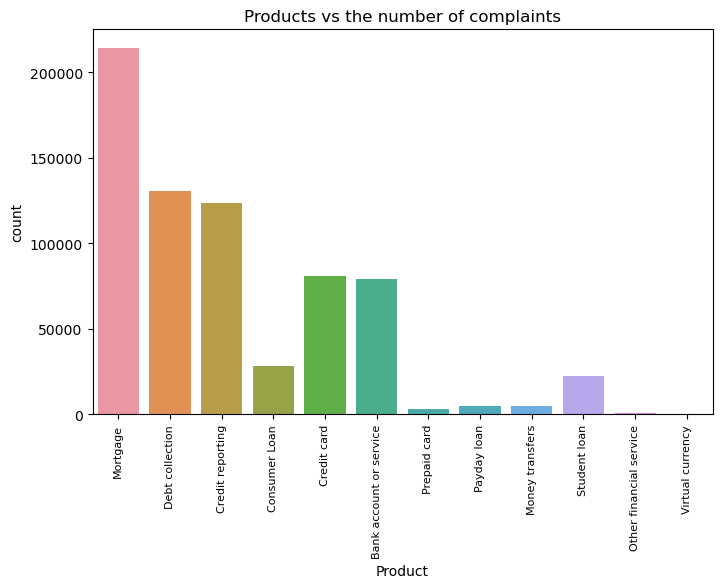

In [23]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(x=df["Product"])
plt.title('Products vs the number of complaints')
plt.xticks(rotation='vertical',size=8)
plt.show()

In [24]:
round(100 * df["Product"].value_counts() / df["Product"].count(),1)

Mortgage                   30.9
Debt collection            18.8
Credit reporting           17.9
Credit card                11.6
Bank account or service    11.4
Consumer Loan               4.0
Student loan                3.3
Payday loan                 0.7
Money transfers             0.7
Prepaid card                0.5
Other financial service     0.1
Virtual currency            0.0
Name: Product, dtype: float64

###### We can see that Mortgage has the highest number of complaints with 31%, lets check the sub products for Mortgage and all products to know which ones occur the most.

### Sub products with the most complaints

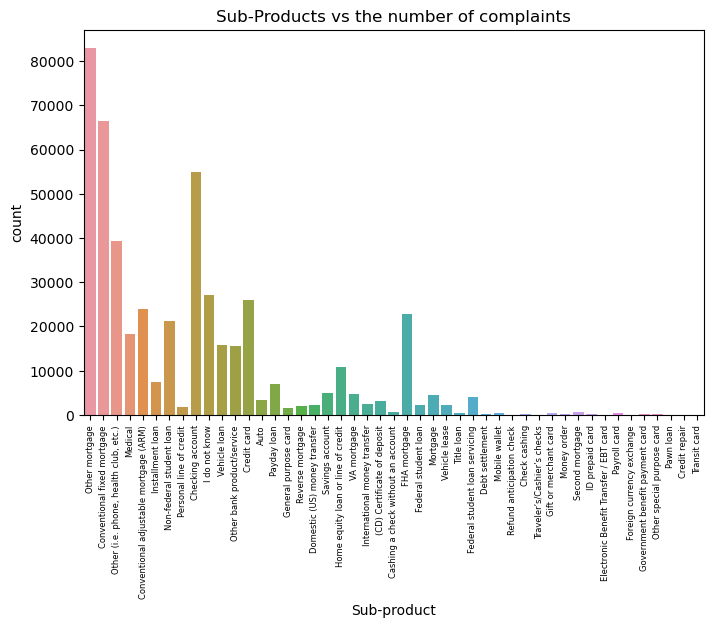

In [25]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(x=df["Sub-product"])
plt.title('Sub-Products vs the number of complaints')
plt.xticks(rotation='vertical',size=6)
plt.show()

In [26]:
#df.value_counts(subset=["Sub-product"], normalize=True)
round(100 * df["Sub-product"].value_counts() / df["Sub-product"].count(),1)

Other mortgage                            17.1
Conventional fixed mortgage               13.7
Checking account                          11.3
Other (i.e. phone, health club, etc.)      8.1
I do not know                              5.6
Credit card                                5.4
Conventional adjustable mortgage (ARM)     4.9
FHA mortgage                               4.7
Non-federal student loan                   4.4
Medical                                    3.8
Vehicle loan                               3.3
Other bank product/service                 3.2
Home equity loan or line of credit         2.2
Installment loan                           1.6
Payday loan                                1.4
Savings account                            1.0
VA mortgage                                1.0
Mortgage                                   0.9
Federal student loan servicing             0.8
Auto                                       0.7
(CD) Certificate of deposit                0.7
International

### Mortgage sub products with the most complaints

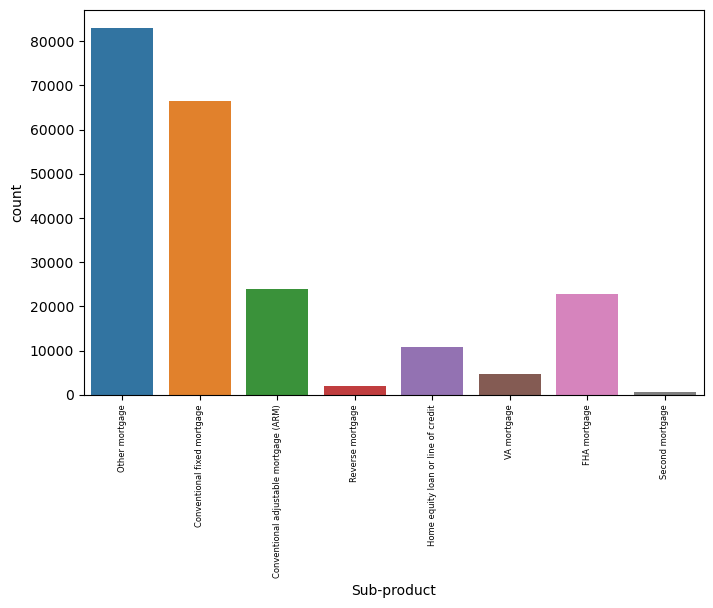

In [27]:
plt.figure(figsize=(8,5),dpi=100)
mortgage_data = df.loc[df["Product"].isin(["Mortgage"])]
sns.countplot(x=mortgage_data["Sub-product"])
plt.xticks(rotation='vertical',size=6)
plt.show()

In [28]:
round(100 * mortgage_data["Sub-product"].value_counts() / mortgage_data["Sub-product"].count(),1)

Other mortgage                            38.7
Conventional fixed mortgage               31.0
Conventional adjustable mortgage (ARM)    11.2
FHA mortgage                              10.7
Home equity loan or line of credit         5.0
VA mortgage                                2.2
Reverse mortgage                           0.9
Second mortgage                            0.3
Name: Sub-product, dtype: float64

###### We can see from the graphs and data above that Other Mortgage has the highest number of complaints, followed closely by Conventional fixed mortgage and thirdly the checking account.

### Issue with the most complaint

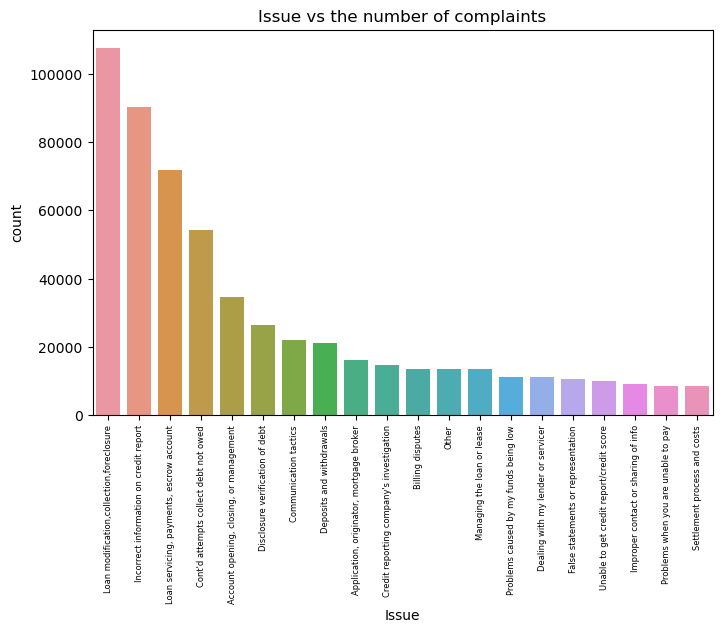

In [29]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(x=df["Issue"],order=df["Issue"].value_counts().iloc[:20].index)
plt.title('Issue vs the number of complaints')
plt.xticks(rotation='vertical',size=6)
plt.show()

### Issues with the most complaint based on Mortgage

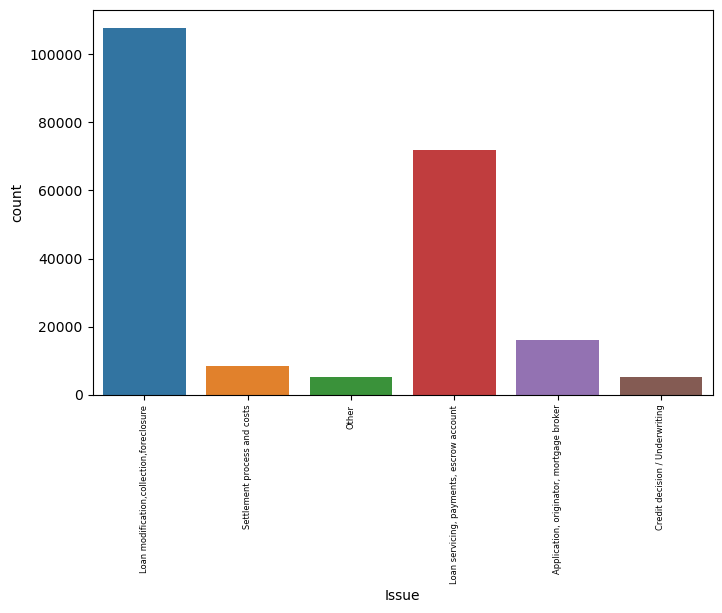

In [30]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(x=mortgage_data["Issue"])
plt.xticks(rotation='vertical',size=6)
plt.show()

###### It is clear that (a.) loan modification, collection and foreclosure (b.) Incorrect information on credit report (c.) Loan servicing, payments, escrow account are the most occuring issues

### Companies with the most complaints

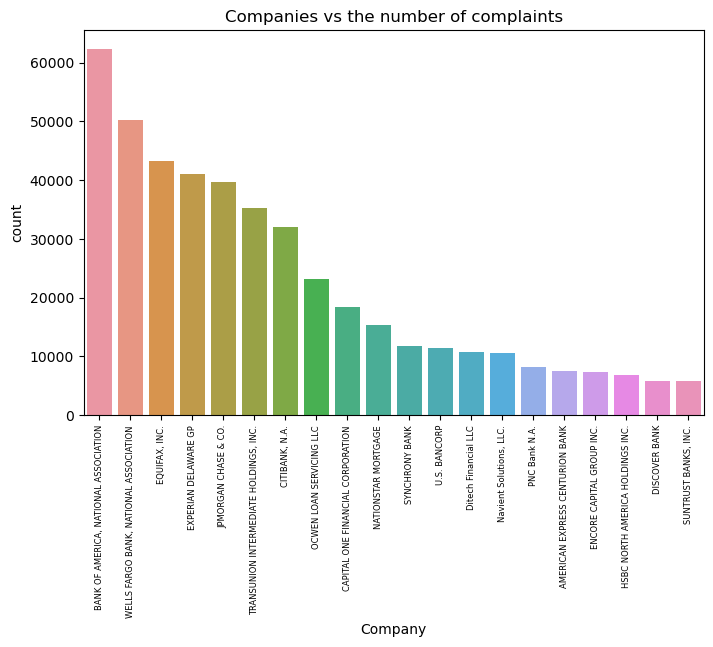

In [31]:
#There are 4094 unique values. lets plot the top 20 companies with the most complaints.
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(x=df["Company"],order=df["Company"].value_counts().iloc[:20].index)
plt.title('Companies vs the number of complaints')
plt.xticks(rotation='vertical',size=6)
plt.show()

### States with the most complaints

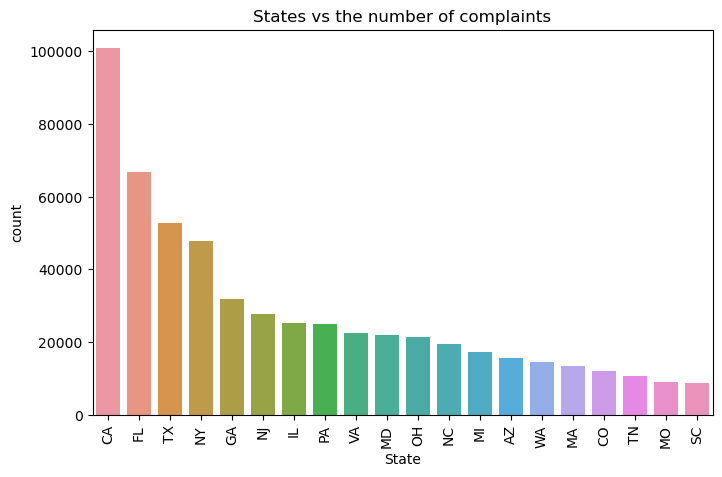

In [32]:
#There are 63 unique values. lets plot the top 20 states with the most complaints. 
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(x=df["State"],order=df["State"].value_counts().iloc[:20].index)
plt.title('States vs the number of complaints')
plt.xticks(rotation='vertical',size=10)
plt.show()

### Let's look at the channels of submission

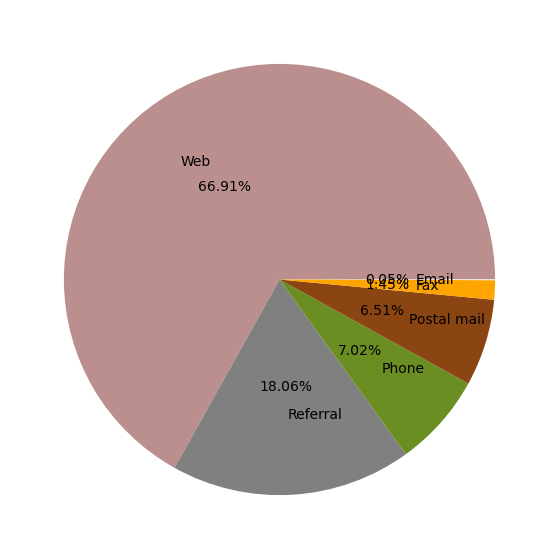

In [33]:
#df["Submitted via"].value_counts()
plt.figure(figsize=(7,7),dpi=100)
plt.pie(x=df["Submitted via"].value_counts().values,labels=df["Submitted via"].value_counts().keys(),autopct="%1.2f%%",
        pctdistance=0.5, colors=['rosybrown', 'gray','olivedrab', 'saddlebrown','orange','white'],labeldistance=.63)
plt.show()

###### Most customers submit their complaints through the web and the least preferred channel for sending complaints is via Email

### How quickly is the complaint sent to the company after it is received

In [34]:
df["Days to send to company"] = df["Date sent to company"] - df["Date received"]
df["Days to send to company"] = df["Days to send to company"].astype(str)
df["Days to send to company"] = df["Days to send to company"].apply(lambda x: x.split(" ")[0])
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State/ZIP,Consumer consent provided?,...,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,State,Year Received,Month Received,Weekday Received,Days to send to company
7,2016-05-18,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company has responded to the consumer and the ...,"WELLS FARGO BANK, NATIONAL ASSOCIATION",NJ 8618,NaN,...,2016-05-23,Closed with explanation,Yes,No,1931957,NJ,2016,May,Wednesday,5
9,2016-11-18,Mortgage,Conventional fixed mortgage,Settlement process and costs,NaN,Started the refinance of home mortgage process...,NaN,AMERICAN NEIGHBORHOOD MORTGAGE,NJ 088XX,Consent provided,...,2016-11-21,Closed with monetary relief,No,No,2216206,NJ,2016,November,Friday,3
12,2016-11-17,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"PMGI, LLC",CA 92356,NaN,...,2016-11-18,Closed with non-monetary relief,No,No,2214174,CA,2016,November,Thursday,1
22,2012-05-17,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA 90242,NaN,...,2012-05-22,Closed with non-monetary relief,No,No,81081,CA,2012,May,Thursday,5
28,2016-02-08,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,Company chooses not to provide a public response,EXPERIAN DELAWARE GP,NC 27703,NaN,...,2016-02-08,Closed with explanation,Yes,No,1776912,NC,2016,February,Monday,0


In [35]:
df["Days to send to company"].value_counts(normalize=True)

0      0.462307
1      0.115903
2      0.078724
3      0.061548
4      0.058204
         ...   
329    0.000001
393    0.000001
326    0.000001
360    0.000001
348    0.000001
Name: Days to send to company, Length: 446, dtype: float64

###### 46% of complaints are sent to the company on the same day, 12% of complaints are sent to the company on the next day, 8% of complaints are sent two days after the complaint was made. Few complaints were sent to the company after a year probably due to an oversight from the employee or not having enough information to send yet.

In [36]:
df["Company response to consumer"].value_counts()

Closed with explanation            518671
Closed with non-monetary relief     87713
Closed with monetary relief         47275
Closed                              16256
Closed without relief               16041
Closed with relief                   4647
Untimely response                    2878
In progress                           205
Name: Company response to consumer, dtype: int64

#### Let's examine the complaints still in progress

In [37]:
inprogress_data = df.loc[df["Company response to consumer"].isin(["In progress"])]
inprogress_data.groupby(by="Year Received").count()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State/ZIP,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,State,Month Received,Weekday Received,Days to send to company
Year Received,,,,,,,,,,,,,,,,,,,,
2012,3,3,3,3,0,0,0,3,3,0,3,3,3,3,3,3,3,3,3,3
2013,3,3,3,3,1,0,0,3,3,0,3,3,3,3,3,3,3,3,3,3
2014,48,48,45,48,36,0,0,48,48,0,48,48,48,48,48,48,48,48,48,48
2015,74,74,67,74,56,28,0,74,74,45,74,74,74,74,74,74,74,74,74,74
2016,77,77,74,77,48,32,1,77,77,63,77,77,77,77,77,77,77,77,77,77


###### We can see that there are complaints still in progress since 2012, 2013, 2014, 2015. These need to be look into immeditely because they are over a year

### Plot the products against the timely response

<Figure size 1200x800 with 0 Axes>

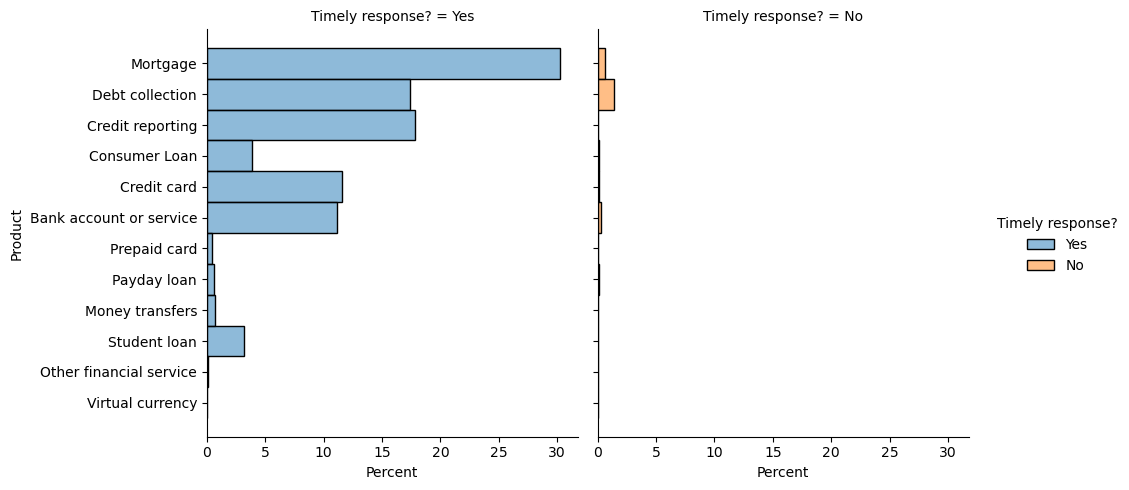

In [38]:
plt.figure(figsize=(12,8),dpi=100)
sns.displot(data=df, y="Product", hue="Timely response?", col="Timely response?",stat="percent")
sns.color_palette("rocket", as_cmap=True)
plt.show()

Debt Collection appear to have the worst timely response but generally, we have good timely response for all the products.

### Plot the Company against the timely response

<Figure size 1200x800 with 0 Axes>

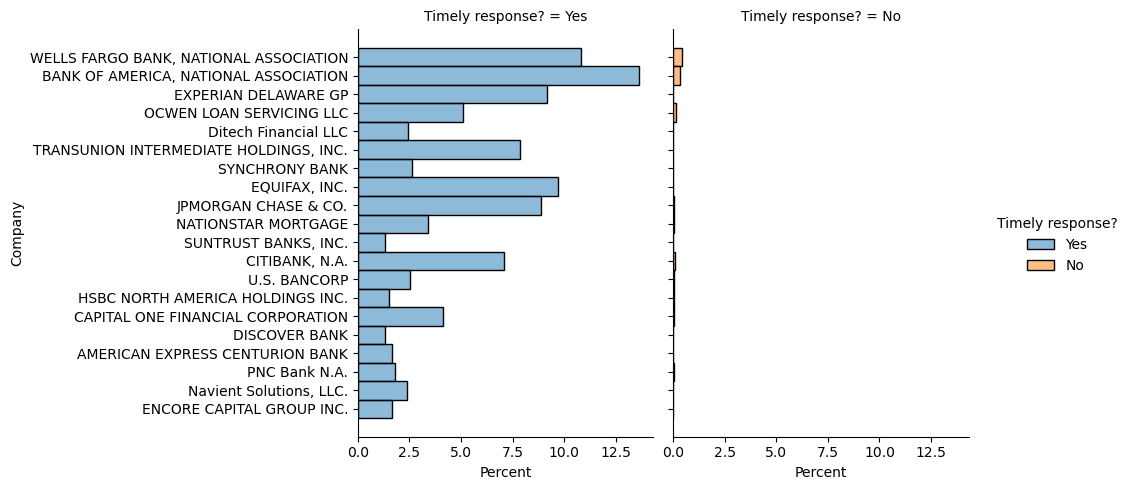

In [39]:
#we will only look at the top 15
def Convert(string):
    li = list(string)
    return li

options = df["Company"].value_counts().iloc[:20].index
new_options = Convert(options)
#new_options
data3 = df[df["Company"].isin(new_options)]
data3.head()

plt.figure(figsize=(12,8),dpi=100)
sns.displot(data=data3, y="Company", 
            hue="Timely response?", col="Timely response?", stat="percent")
plt.show()

###### Wells Fargo bank seems to have the least timely response but generally, all companies have good response.

## Let's analyze the disputes

In [40]:
df["Consumer disputed?"].value_counts(normalize=True)

No     0.801347
Yes    0.198653
Name: Consumer disputed?, dtype: float64

### Products with the most disputes

<Figure size 1200x800 with 0 Axes>

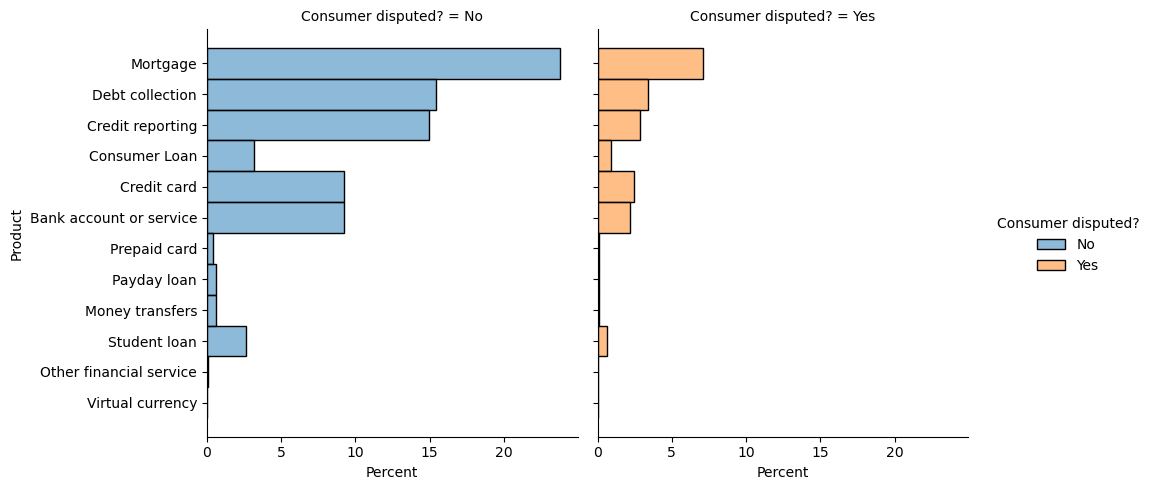

In [41]:
plt.figure(figsize=(12,8),dpi=100)
sns.displot(data=df, y="Product", hue="Consumer disputed?",stat="percent", col="Consumer disputed?")
sns.color_palette("rocket", as_cmap=True)
plt.show()

In [42]:
data5 = df[['Product', 'Consumer disputed?']].copy()
#data5.head()
dispute_rate = (data5.melt('Consumer disputed?').groupby(['variable', 'Consumer disputed?','value'])
                .size().unstack(1, fill_value=0))

dispute_rate = (dispute_rate.div(dispute_rate.sum(1), axis=0).mul(100).add_prefix('Disputed_'))
dispute_rate.sort_values(by=["Disputed_Yes"],ascending=False)

Consumer disputed?                Disputed_No  Disputed_Yes
variable value                                             
Product  Virtual currency           40.000000     60.000000
         Mortgage                   76.985357     23.014643
         Consumer Loan              77.841942     22.158058
         Credit card                79.043776     20.956224
         Student loan               80.197192     19.802808
         Other financial service    80.648770     19.351230
         Bank account or service    80.845909     19.154091
         Debt collection            81.985607     18.014393
         Credit reporting           83.829526     16.170474
         Payday loan                85.064293     14.935707
         Money transfers            85.534079     14.465921
         Prepaid card               85.816024     14.183976

###### 60% of all Virtual Currency complaints, 23% of complaints relating to Mortgage, 22% of Consumer Loan complaints, 21% of Credit card complaints results in a dispute.

### Issues with the highest disputes

In [43]:
data6= df[['Issue', 'Consumer disputed?']].copy()
#data6.head()
dispute_rate = (data6.melt('Consumer disputed?').groupby(['variable', 'Consumer disputed?','value'])
                .size().unstack(1, fill_value=0))

dispute_rate = (dispute_rate.div(dispute_rate.sum(1), axis=0).mul(100).add_prefix('Disputed_'))
dispute_rate.sort_values(by=["Disputed_Yes"],ascending=False).head(20)

Consumer disputed?                                 Disputed_No  Disputed_Yes
variable value                                                              
Issue    Lender damaged or destroyed property         0.000000    100.000000
         Lender sold the property                    57.142857     42.857143
         Lost or stolen check                        64.864865     35.135135
         Cash advance                                70.689655     29.310345
         Settlement process and costs                72.123469     27.876531
         Application, originator, mortgage broker    73.644626     26.355374
         Rewards                                     74.055513     25.944487
         Arbitration                                 74.203822     25.796178
         Credit line increase/decrease               74.238642     25.761358
         Improper use of my credit report            74.465486     25.534514
         Credit decision / Underwriting              74.496006     25.503994
         Credit reporting company's investigation    74.604811     25.395189
         Taking out the loan or lease                74.778991     25.221009
         Privacy                                     75.055679     24.944321
         Forbearance / Workout plans                 75.097276     24.902724
         Wrong amount charged or received            75.502008     24.497992
         Credit reporting                            75.806452     24.193548
         Bankruptcy                                  76.168224     23.831776
         Account terms and changes                   76.210526     23.789474
         Disclosures                                 76.315789     23.684211

###### All issues relating to Lender damaged or destroyed property leads to a dispute. 43% of Lender sold the property, 35% of Lost or stolen check, 29% of Cash advance issues results in a dispute

### Company feedback leading to a dispute

<Figure size 1200x800 with 0 Axes>

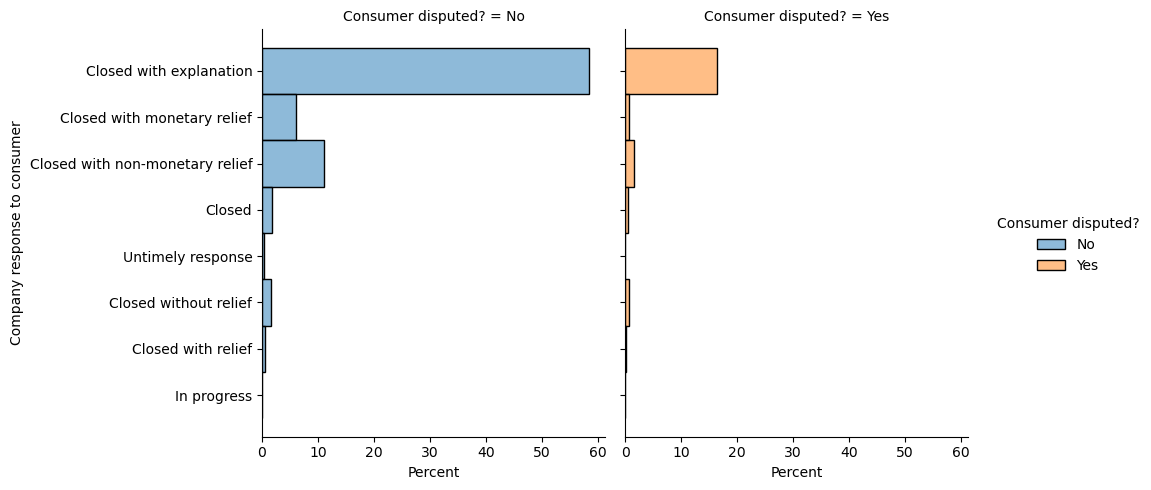

In [44]:
plt.figure(figsize=(12,8),dpi=100)
sns.displot(data=df, y="Company response to consumer", hue="Consumer disputed?", col="Consumer disputed?",stat="percent")
sns.color_palette("rocket", as_cmap=True)
plt.show()

In [45]:
data= df[['Company response to consumer', 'Consumer disputed?']].copy()
data.head()
dispute_rate = (data.melt('Consumer disputed?').groupby(['variable','Consumer disputed?','value'])
                .size().unstack(1, fill_value=0))

dispute_rate = (dispute_rate.div(dispute_rate.sum(1), axis=0).mul(100).add_prefix('Disputed_'))
dispute_rate.sort_values(by=["Disputed_Yes"],ascending=False)

Consumer disputed?                                            Disputed_No  \
variable                     value                                          
Company response to consumer Closed without relief              73.093947   
                             Closed with explanation            78.072613   
                             Closed                             78.918553   
                             Closed with relief                 86.292232   
                             Closed with non-monetary relief    87.958455   
                             Closed with monetary relief        89.150714   
                             Untimely response                  99.965254   
                             In progress                       100.000000   

Consumer disputed?                                            Disputed_Yes  
variable                     value                                          
Company response to consumer Closed without relief               26.906053  
                             Closed with explanation             21.927387  
                             Closed                              21.081447  
                             Closed with relief                  13.707768  
                             Closed with non-monetary relief     12.041545  
                             Closed with monetary relief         10.849286  
                             Untimely response                    0.034746  
                             In progress                          0.000000

###### 27% of complaints Closed without relief results in a dispute and 22% of complaints Closed with explanation leads to a dispute

### Company with the most disputes

In [46]:
data6= df[['Company', 'Consumer disputed?']].copy()
#len(data6)
dispute_rate = (data6.melt('Consumer disputed?').groupby(['variable', 'Consumer disputed?','value'])
               .size().unstack(1, fill_value=0))
dispute_rate.sort_values(by=["Yes"],ascending=False).head(15)

Consumer disputed?                                  No    Yes
variable value                                               
Company  BANK OF AMERICA, NATIONAL ASSOCIATION   48582  13829
         WELLS FARGO BANK, NATIONAL ASSOCIATION  38971  11259
         EQUIFAX, INC.                           34188   9147
         JPMORGAN CHASE & CO.                    30694   9049
         CITIBANK, N.A.                          25662   6321
         OCWEN LOAN SERVICING LLC                17685   5556
         TRANSUNION INTERMEDIATE HOLDINGS, INC.  30107   5110
         EXPERIAN DELAWARE GP                    36051   4970
         NATIONSTAR MORTGAGE                     11743   3638
         CAPITAL ONE FINANCIAL CORPORATION       15060   3438
         U.S. BANCORP                             8923   2491
         Ditech Financial LLC                     8441   2360
         AMERICAN EXPRESS CENTURION BANK          5417   2078
         Navient Solutions, LLC.                  8603   2036
         SYNCHRONY BANK                           9930   1812

In [47]:
# some companies with 100% of their complaints resulting in a dispute
dispute_rate = (dispute_rate.div(dispute_rate.sum(1), axis=0).mul(100).add_prefix('Disputed_'))
dispute_rate.sort_values(by=["Disputed_Yes"],ascending=False).head(10)

Consumer disputed?                                 Disputed_No  Disputed_Yes
variable value                                                              
Company  INTERFIRST LENDING CORPORATION                    0.0         100.0
         GREAT WESTERN BANCORP, INC.                       0.0         100.0
         AMERICAN MIDWEST MORTGAGE                         0.0         100.0
         Vitek Real Estate Industries Group, Inc.          0.0         100.0
         Noyes Law Firm P.C.                               0.0         100.0
         Metro Capital Mortgage Corporation                0.0         100.0
         Lakeland West Capital, LLC                        0.0         100.0
         MORTGAGES UNLIMITED, INC.                         0.0         100.0
         Vonda J. Dunn, P.C.                               0.0         100.0
         NORTH AMERICAN FINANCIAL CORP                     0.0         100.0

###### Bank of America, Wells Fargo Bank, Equifax, JP Morgan Chase, Citibank has about 20% of their complaints resulting in a dispute. American Express Centurion Bank has about 40% of their complaints resulting in a dispute. Some companies have 100% of their complaints resulting in disputes.